## Import Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## 1.	What is Clustering. How clustering helps in performing EDA? 

Clustering is the method of creating different groups by using the dimensions. In other words, the groups of related feature has been created using Clustering technique. Widely there are two types of clustering:

1. Hierarchial Clustering- Here the clusters has been created using the hierarchial model, either from bottom to top (Agglomerative Clustering) or top to bottom (Divisive Clustering). From the dataset a hierarchy has been created of the related features and an structure is formed. We calculate the labels based on the Dendogram diagram

2. Positional Clustering- Here the clusters are form using the mean distance of the data points and then clusters using two methods- Kmean and Fuzzy C-mean. We find out about the optimum number of labels using elbow plot.

Clustering is very helpful in EDA, as it will tell you the diffrent groups that are formed by data points. If the distance between these groups (clusters) is very high we can create different models of those clusters and that will give you the better result. Also labelling the dataset with clusters number in feature engineering by adding column will help the model to find better predictions

## 2.	What is the difference between K Means & Agglomerative Clustering. Explain it using some data in Jupyter Notebook through Coding. 

K Means- This is the positional clustering technique, here we find out the clusters using centroids. We get the optimum number of clusters from elbow plot. After that the same number of centroids are created as number of clusters and it spreads across the data points. After this, centroids will start creating clusters keeping the WCSS(Withing Cluster Sum of Squares) or Inertias as low as possible. WCSS is the sum of square of datapoints from centroid. After this centroids will move in different iterations and calculate WCSS value for each of them. As long as WCSS value is getting low the centroids will move and after stagnation, it will stop and declare the clusters. In each iterations, it might be possible that datapoints are moving form one cluster to another to generate better WCSS values. The final clusters will be created when previous iteration and new iteration will give same lowest value of WCSS.

Agglomerative Clustering- This is the Hierarchial clustering technique, here all the datapoints are kept on the same plane and then points will start merging with one another on the basis of their distance. The merged point will create an upward hierarchy with mid point of these points as the height. The same thing will happend with all the points and/or merged points untill one final clusters containing all the vlaues has been created. This diagram is called Dendogram and we identify the optimum number of cluster using this diagram

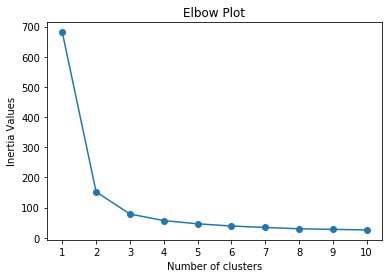

In [2]:
# I will use iris dataset to demonstrate the difference between Kmeans and Agglomerative 

iris_new = load_iris()
iris = pd.DataFrame(iris_new.data)
iris.columns = iris_new.feature_names

ks = range(1,11)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k)
    #fit the model
    model.fit(iris)
    #append the inertia
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Plot')
plt.xticks(ks)
plt.show()

This is the elbow plot used to check the optimum level of clusters in Kmean, where the inertias values start stagnating is the number of clusters to be created. As you can see, 3 is the number of cluster we will use, after which there is not much drop in ineterias for further points

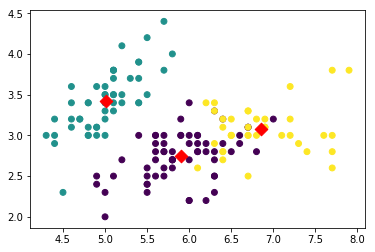

In [3]:
kmeanmodel = KMeans(n_clusters=3)
kmeanlabel=kmeanmodel.fit_predict(iris)
centroids = kmeanmodel.cluster_centers_

#we plot using 2 dimentions from the given set to get some picture of the cluster
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

xs = iris_new.data[:,0]
ys = iris_new.data[:,1]

plt.scatter(xs,ys, c= kmeanlabel, s = 35)
plt.scatter(centroid_x, centroid_y, marker = 'D', c='r', s=80)
plt.show()

These are the clusters created using kmean with diamond between as a centroids

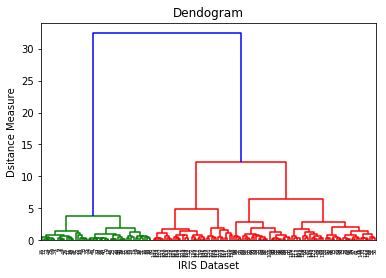

In [4]:
#For agglomerative, we will use dendogram

dendogram=sch.dendrogram(sch.linkage(iris, method='ward'))
plt.title('Dendogram')
plt.xlabel('IRIS Dataset')
plt.ylabel('Dsitance Measure')
plt.show()

Here we find out the optimum value using the longest line with no cut form any other line splits. So the second red line created in second level is the longest line without any cuts, so we will calculate the number of line this line is splitting from the bottom, that will be out cluster numbers. Here it will be 3

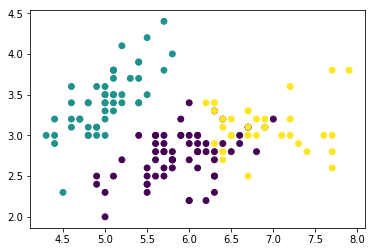

In [5]:
aggmodel= AgglomerativeClustering(n_clusters=3,linkage='ward')
agglabels=aggmodel.fit_predict(iris)

#Use two dimentions to plot the labels:

xs = iris_new.data[:,0]
ys = iris_new.data[:,1]

plt.scatter(xs,ys, c= agglabels, s = 35)
plt.show()

These are the clusters created using agglomerative approach

## 3.	Explain the Difference between the Silhoutte Score and Linkage Method – “Single”. 

Sillhoute score tells the seperation between the resulting clusters. The sillhoute plots explains that how close each points in the one cluster is to the points in the neighbouring clusters. Silhouette coefficients nearly equal to zero indicates that the clusters are touching each other in the boundries. As the clusters grew apart, value of coefficient increases.

Single Mehod Linkage is the bottoms-up approach of the hierarchial clustering. At each steps, it merges two close clusters to form the single cluster. It will check for the distance between datapoint in one clusters with all the neighbouring clusters and then whichever is the lowest, it will merge with that cluster

## 4.	Consider the University Dataset with the 777 Rows and 18 Columns. Here, you need to identify the optimum cluster size by using K Means. 

In [6]:
university = pd.read_csv('_College Data.csv', index_col=0)

In [7]:
university= pd.get_dummies(university) #Kmean will not take categorical calumn of private as yes or no so creating dummies

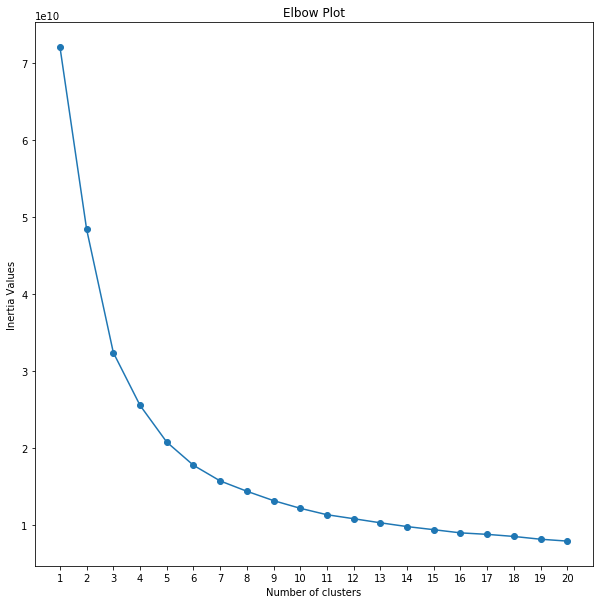

In [9]:
#To find out the optimum clusters we will make use of elbow plot:

ks = range(1,21)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k)
    #fit the model
    model.fit(university)
    #append the inertia
    inertias.append(model.inertia_)

#Plotting the different inertias for different cluster values

plt.figure(figsize=(10,10))    
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Plot')
plt.xticks(ks)
plt.show()

As you can see that after 10 clusters the decrease in inertia values is very less between further clusters, so we will take the optimum number of clusters to be 10

## 5.	Consider the Titanic Train Set. Generate Clustering Model on the Training Dataset and find the following: 

1. 	Find out which clustering approach is better – K Means or Agglomerative Clustering. 
2. 	Compare the Labels with the Survived Column Values. The better accuracy score suggests which clustering explains the labels better.
3. 	Also, find out if there is any need of cluster values In Agglomerative Clustering. Write a Note on that.


In [10]:
titanic = pd.read_csv('train-1.csv')

In [11]:
#Missing Value Treatment and feature engineering

arr1=titanic['Name'].str.split(',', expand=True)[1]
title=arr1.str.split('.', expand= True)[0]
titanic['Title']=title

titleage=titanic.groupby('Title').Age.transform('median')
titanic.Age.fillna(titleage, inplace=True)

titanic.Embarked.fillna('S',inplace=True)

In [12]:
#Now we will drop the columns which are mostly uniques and has many null values

titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [13]:
#Now we will create dummies for the remaining columns before fitting to the model
titanic = pd.get_dummies(titanic)

In [14]:
#Splitting the data in independent variables and dependent variables

x = titanic.drop('Survived', axis=1)
y = titanic.Survived

### Comparing Kmean and Agglomerative

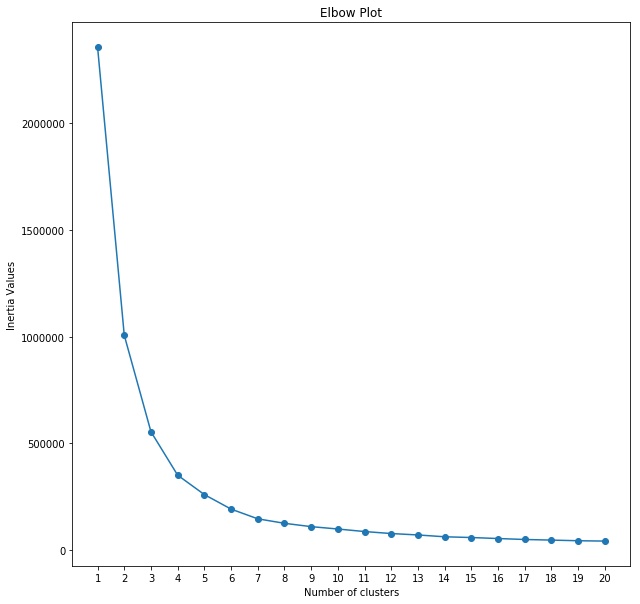

In [15]:
#To find out the optimum clusters we will make use of elbow plot:

ks = range(1,21)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k)
    #fit the model
    model.fit(x)
    #append the inertia
    inertias.append(model.inertia_)

#Plotting the different inertias for different cluster values

plt.figure(figsize=(10,10))    
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Plot')
plt.xticks(ks)
plt.show()

Based on the above elbow plot the best number of clusters should be 7

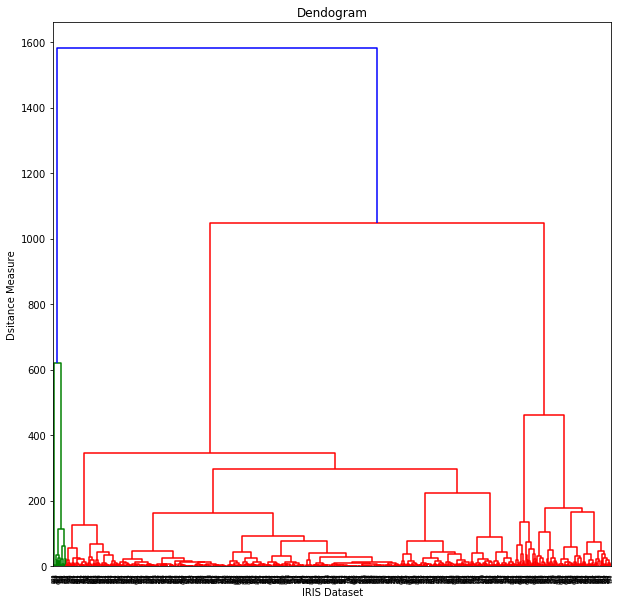

In [16]:
#In dendogram of titanic dataset

plt.figure(figsize=(10,10)) 
dendogram=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram')
plt.xlabel('IRIS Dataset')
plt.ylabel('Dsitance Measure')
plt.show()

The dendogram diagram of the titanic dataset is complicated, but if you compare the red line in the middle line in third hierarchy right side, you will get the number of clusters should be 7

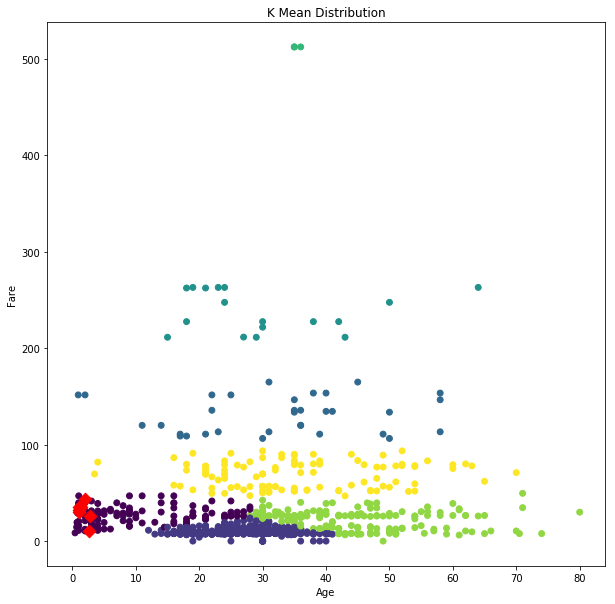

In [42]:
kmeanmodel = KMeans(n_clusters=7)
kmeanlabel=kmeanmodel.fit_predict(x)
centroids = kmeanmodel.cluster_centers_

#we plot using 2 dimentions from the given set to get some picture of the cluster
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

xs = x.Age
ys = x.Fare

plt.figure(figsize=(10,10))
plt.scatter(xs,ys, c= kmeanlabel, s = 35)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K Mean Distribution')
plt.scatter(centroid_x, centroid_y, marker = 'D', c='r', s=80)
plt.show()

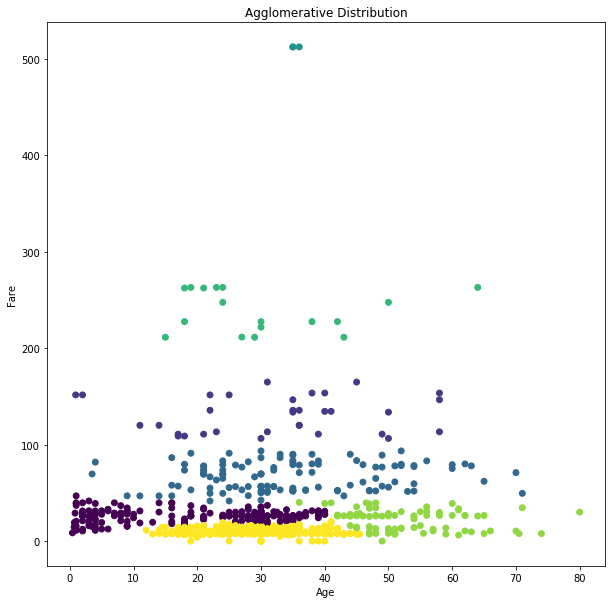

In [43]:
aggmodel= AgglomerativeClustering(n_clusters=7,linkage='ward')
agglabels=aggmodel.fit_predict(x)

#Use two dimentions to plot the labels:

xs = x.Age
ys = x.Fare

plt.figure(figsize=(10,10))
plt.scatter(xs,ys, c= agglabels, s = 35)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Agglomerative Distribution')
plt.show()

By looking at the distribution, elbow plot and dendogram, we can infer that hierarchial is complex for the given dataset. But as far as clustering is concern both the algorithm are able to create good clusters  

### Comparing with the actual lables

In [46]:
#Get the predicted values for kmean clustering
kmeanmodel = KMeans(n_clusters=2)
kmeanpred = kmeanmodel.fit_predict(x)

In [48]:
#Get the predicted values for Agglomerative clustering
aggmodel = AgglomerativeClustering(n_clusters=2, linkage='ward')
aggpred = aggmodel.fit_predict(x)

In [51]:
print('The Accuracy score for KMeans Clustering is : %1.4f' %(metrics.accuracy_score(y,kmeanpred)))
print('The Accuracy score for Agglomerative Clustering is : %1.4f' %(metrics.accuracy_score(y,aggpred)))

The Accuracy score for KMeans Clustering is : 0.6442
The Accuracy score for Agglomerative Clustering is : 0.6251


Kmeans clustering has the slightly better accuracy score, which suggests that the Kmean will better explain the survived column than Agglomerative clustering 

### Need of cluster values in Agglomerative Clustering

The agglomerative approach will create linkages in bottoms up fashion. It will start from the lowest level where all the datapoints are on the same plane and start creating  linkages between points and then between clusters and points or other clusters. With each linkage, as shown in the dendogram above, the clusters will form hierachial shape with the height of midpoint between two clusters/data points and  other clusters/data points . It will only stop at the highest cluster, where all the data points will belong to one cluster. If we provide cluster values to the agglomerative, it will show us the labels uptill that level, otherwise, it will not able to segregate and end up giving same labels to each datapoints.

## 6.	Consider a Kaggle Competition called Digit Recognizer under the following link:
https://www.kaggle.com/c/digit-recognizer 
This is a Supervised ML Problem. You need to apply PCA, find the optimal features count and apply ML. (Algorithm Selection depends on you).
Note - We have already worked on this dataset while applying clustering in classroom. Its time to apply PCA and find out what we get when we submit the result on Kaggle. 


In [3]:
digit = pd.read_csv('train.csv')

In [4]:
x= digit.drop('label', axis=1)
y= digit.label

In [5]:
#Before applyting PCA we need to standadize the x values

sc= StandardScaler()
x_std = sc.fit_transform(x)

In [6]:
x.shape

(42000, 784)

### Applying PCA 

In [7]:
pc =PCA(n_components= None)
Pcomp = pc.fit_transform(x_std)

In [8]:
#Check the optimum number of components for the PCA analysis
variance = 0
for i in range(200):
    variance = variance + pc.explained_variance_ratio_[i]
variance

0.8737255202015841

We can see that 87.37% of the variance can be explained by 200 Principal components, so we will make use of 200 components instead of using 784 columns in modelling

In [9]:
pc =PCA(n_components= 200)
Pcomp = pc.fit_transform(x_std)

### Creating Machine Learning Model

In [10]:
Pcomp = pd.DataFrame(Pcomp)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(Pcomp,y,test_size=0.3, random_state=1)

In [12]:
#Logistic Regression model

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg.score(x_test,y_test)

0.9158730158730158

In [13]:
#Random Forest model

rfcl = RandomForestClassifier()
rfcl.fit(x_train,y_train)
rfcl.score(x_test,y_test)

0.8797619047619047

The accuracy score of logistic regression for the training is 91.58%, I will apply it on the test dataset given and get the predictions for kaggle submission

### Generate output file for kaggle submission

In [14]:
digittest = pd.read_csv('test.csv')

In [15]:
#Apply Standardization
digittest = sc.transform(digittest)

In [16]:
#Apply PCA
digittest = pc.transform(digittest)

In [17]:
#Apply logistic Regression
digitpred=logreg.predict(digittest)

In [18]:
# Create an output file

output = pd.DataFrame({'ImageId': np.arange(1,28001),'Label': digitpred})
output.to_csv('digitsubmission.csv', index=0)

After submission in kaggle, I am getting accuracy of 0.91271 for the given test set by using Logistic Regression model

The End